## Web Scraping and Data Analysis of Amazon's Top 30 Bestselling Smartphones: Extraction(Phone Name/Model, Specs and Prices), Analysis and Visualization

###  Scraping

1. Importing Required Libraries

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

2. Making a Request to Amazon's Bestsellers Page

In [2]:
session = requests.session()
url = "https://www.amazon.in/gp/bestsellers/electronics/1805560031"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9",
    "Accept-Encoding": "gzip, deflate, br",
    "Connection": "keep-alive",
    "Upgrade-Insecure-Requests": "1",
    "TE": "Trailers"
}

response = session.get(url, headers=headers, allow_redirects=True)

if response.status_code == 200:
    print("Request was successful!")
else:
    print(f"Request was failed!\nError Code: {response.status_code}")

Request was successful!


3. Saving Amazon's HTML Content and Parsing with BeautifulSoup 

In [ ]:
with open ('amazon_bestsellers_mobiles.html', 'w', encoding='utf-8') as f:
    f.write(response.text)

with open ('amazon_bestsellers_mobiles.html', 'r', encoding='utf-8') as f:
    html_content = f.read()

soup = BeautifulSoup(html_content, "html.parser")
print(soup.prettify())

4. Data Extraction: Phone Models/Names, Specifications, and Prices

In [ ]:
data_list = []

#Extracting basic info (Phone model name and Specifications)
main_tags = soup.find_all('div', class_='_cDEzb_p13n-sc-css-line-clamp-3_g3dy1')

for tag in main_tags: 

    phone_info = tag.get_text(strip=True) 
    
    if "(" in phone_info:
        name = phone_info.split("(")[0]
        specs = phone_info.split("(")[1].replace(')', '')
    else:
        name = phone_info.strip()
        sepcs = "No sepcs available"

    data_list.append({'Phone': name, 'Specifications': specs})

#Extracting Prices
price_tags = soup.find_all('span', class_='_cDEzb_p13n-sc-price_3mJ9Z')

for i, price_tag in enumerate(price_tags):
    price = price_tag.get_text()

    data_list[i]['Price'] = price

5. Converting Extracted Data to a Pandas DataFrame

In [49]:
#converting the list of dictionaries of extracted data to a pandas df
df = pd.DataFrame(data_list)
df.head()

,Phone,Specifications,Price
0,Samsung Galaxy M05,"Mint Green, 4GB RAM, 64 GB Storage | 50MP Dual...","₹6,299.00"
1,realme NARZO N65 5G,"Amber Gold 6GB RAM, 128GB Storage India's 1st ...","₹11,249.00"
2,iQOO Z9s 5G,"Onyx Green, 8GB RAM, 128GB Storage | 120 Hz 3D...","₹19,999.00"
3,POCO X6 Neo 5G,"Astral Black, 8GB RAM, 128GB Storage | Dimensi...","₹11,999.00"
4,iQOO Z9s 5G,"Onyx Green, 8GB RAM, 256GB Storage | 120 Hz 3D...","₹21,999.00"


6. Exporting DataFrame to CSV for Future Use

In [43]:
df.to_csv('amazon_top_30_bestselling_smartphones', index=False)

### Data Analysis

1. Data Preparation

- Checking for missing values

In [51]:
df.isnull().sum()

Phone             0
Specifications    0
Price             0
dtype: int64

- Converting Price column: string to numeric(float)

In [54]:
#converting price column from str to float and removing '₹' and commas from uts entries.
df['Price'] = df['Price'].apply(lambda x: float(x.replace('₹', '').replace(',', '').strip()) if isinstance(x, str) else x)
df.head()


,Phone,Specifications,Price
0,Samsung Galaxy M05,"Mint Green, 4GB RAM, 64 GB Storage | 50MP Dual...",6299.0
1,realme NARZO N65 5G,"Amber Gold 6GB RAM, 128GB Storage India's 1st ...",11249.0
2,iQOO Z9s 5G,"Onyx Green, 8GB RAM, 128GB Storage | 120 Hz 3D...",19999.0
3,POCO X6 Neo 5G,"Astral Black, 8GB RAM, 128GB Storage | Dimensi...",11999.0
4,iQOO Z9s 5G,"Onyx Green, 8GB RAM, 256GB Storage | 120 Hz 3D...",21999.0


- Cleaning Specifications Column

In [58]:
#replacing commas with '|' symbol to create a consistent delimiter
df['Specifications'] = df['Specifications'].replace(',', '|', regex=True) 
#removing any leading/trailing whitespaces
df['Specifications']= df['Specifications'].str.strip()
df.head()

,Phone,Specifications,Price
0,Samsung Galaxy M05,Mint Green| 4GB RAM| 64 GB Storage | 50MP Dual...,6299.0
1,realme NARZO N65 5G,Amber Gold 6GB RAM| 128GB Storage India's 1st ...,11249.0
2,iQOO Z9s 5G,Onyx Green| 8GB RAM| 128GB Storage | 120 Hz 3D...,19999.0
3,POCO X6 Neo 5G,Astral Black| 8GB RAM| 128GB Storage | Dimensi...,11999.0
4,iQOO Z9s 5G,Onyx Green| 8GB RAM| 256GB Storage | 120 Hz 3D...,21999.0


- Creating a new 'Brand' column with brand names for each smartphone (eg. Samsung, POCO, Apple etc.)

In [60]:
df['Brand'] = df['Phone'].str.split().str[0]    #extracting the first word ('brand name') from the phone column
df.head()

,Phone,Specifications,Price,Brand
0,Samsung Galaxy M05,Mint Green| 4GB RAM| 64 GB Storage | 50MP Dual...,6299.0,Samsung
1,realme NARZO N65 5G,Amber Gold 6GB RAM| 128GB Storage India's 1st ...,11249.0,realme
2,iQOO Z9s 5G,Onyx Green| 8GB RAM| 128GB Storage | 120 Hz 3D...,19999.0,iQOO
3,POCO X6 Neo 5G,Astral Black| 8GB RAM| 128GB Storage | Dimensi...,11999.0,POCO
4,iQOO Z9s 5G,Onyx Green| 8GB RAM| 256GB Storage | 120 Hz 3D...,21999.0,iQOO


- Final Data Check

In [68]:
print(df.describe())
df.head()

              Price
count     30.000000
mean   21085.266667
std    17488.565078
min     5899.000000
25%    10499.000000
50%    13499.000000
75%    21999.000000
max    71499.000000


,Phone,Specifications,Price,Brand
0,Samsung Galaxy M05,Mint Green| 4GB RAM| 64 GB Storage | 50MP Dual...,6299.0,Samsung
1,realme NARZO N65 5G,Amber Gold 6GB RAM| 128GB Storage India's 1st ...,11249.0,realme
2,iQOO Z9s 5G,Onyx Green| 8GB RAM| 128GB Storage | 120 Hz 3D...,19999.0,iQOO
3,POCO X6 Neo 5G,Astral Black| 8GB RAM| 128GB Storage | Dimensi...,11999.0,POCO
4,iQOO Z9s 5G,Onyx Green| 8GB RAM| 256GB Storage | 120 Hz 3D...,21999.0,iQOO


### Data Visualization

In [64]:
import matplotlib.pyplot as plt

1. Price Distribution of Smartphones using Histogram

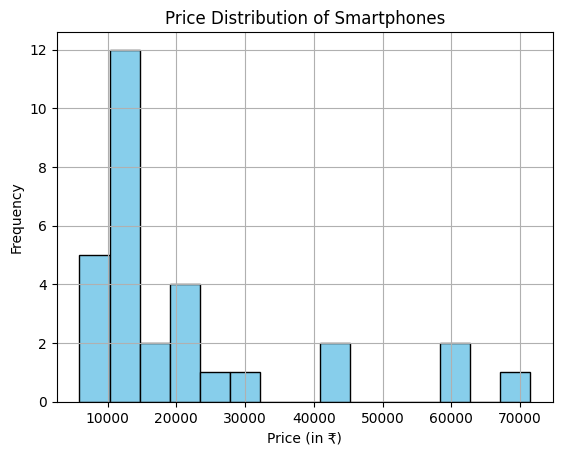

In [70]:
plt.hist(df['Price'], bins=15, color='skyblue', edgecolor='black')
plt.title('Price Distribution of Smartphones')
plt.xlabel('Price (in ₹)')
plt.ylabel('Frequency')
plt.grid(True)

2. Brands vs Price - Average price of each brand using bar plot

Text(0, 0.5, 'Average Price (in ₹)')

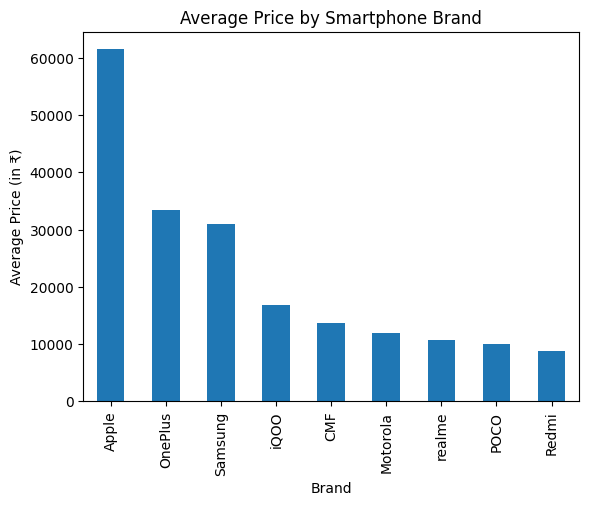

In [75]:
average_brand_price = df.groupby('Brand')['Price'].mean().sort_values(ascending=False)

average_brand_price.plot(kind='bar')
plt.title('Average Price by Smartphone Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price (in ₹)')

3. Brand Popularity - based on the frequency of their occurrence in the dataset

Text(0, 0.5, 'Popularity (frequency)')

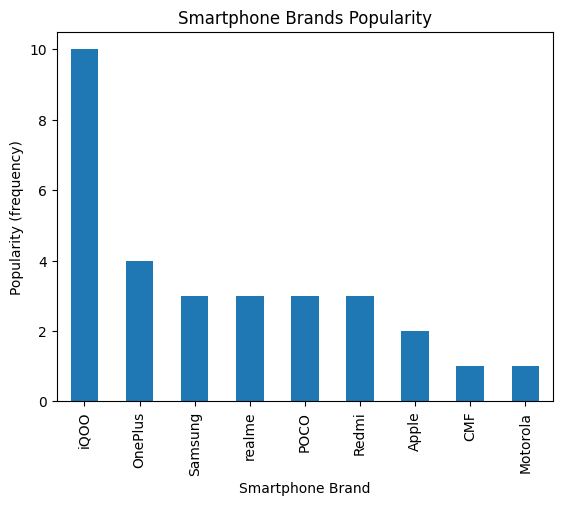

In [79]:
brand_freq = df['Brand'].value_counts()

brand_freq.plot(kind='bar')
plt.title("Smartphone Brands Popularity")
plt.xlabel("Smartphone Brand")
plt.ylabel("Popularity (frequency)")

4. Smartphone Brands Market Share Using Pie Chart -  How many popular phones belong to each brand 

Text(0.5, 1.0, 'Smartphone Brands Market Share')

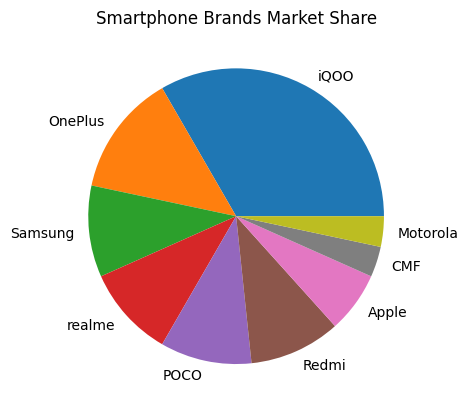

In [83]:
plt.pie(brand_freq, labels=brand_freq.index)
plt.title('Smartphone Brands Market Share')

5. Most Expensive Phones by Brand

Text(0, 0.5, 'Maximum Price (in ₹)')

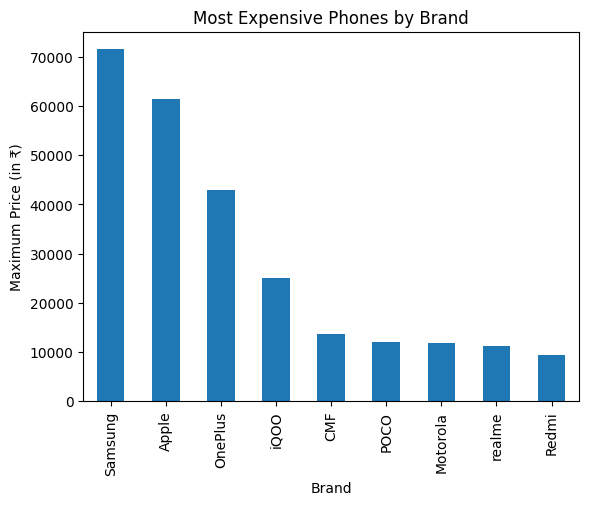

In [84]:
max_price_by_brand = df.groupby('Brand')['Price'].max().sort_values(ascending=False)

max_price_by_brand.plot(kind='bar')
plt.title("Most Expensive Phones by Brand")
plt.xlabel('Brand')
plt.ylabel('Maximum Price (in ₹)')